# Approximation of mathematical functions

In [ ]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

## $\exp$

The Taylor series of $\exp(x)$ converges everywhere:

$$\exp(x) = e^x = \sum_{i=0}^\infty \frac {x^i} {i!}
=1+x+\frac{x^2}{2}+\frac{x^3}{6}+...$$

since

$$\frac {d \exp(x)} {d x} = \exp(x)$$
$$ exp(0) = 1$$

In [ ]:
def exp(x, n):
    """Computes exp(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """
    v = 1       # initialize the value to the first term of Taylor series
    xi = x      # initialize the ith power of x to x
    fact = 1    # initialize fact to 0!
    for i in range(1, n+1):
        fact *= i       # compute i!
        v += xi/fact    # add a term to the Taylor series
        xi *= x         # compute the next power of x
    return v    # return the result
exp(2,50)

7.389056098930649

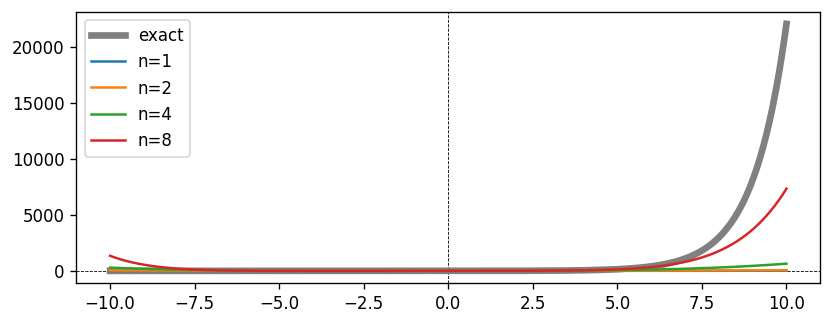

In [ ]:
def plot_fun(f, g, min=-5, max=5, logn_from=0, logn_till=4):
  """Plots approximate function f with a finite number of terms of Taylor
  series, and accurate function g for a range of arguments between min and max.
  f is plotted for numbers of Taylor series terms ranging exponentially from
  2**logn_from to 2**(logn_till-1), inclusive.
  Arguments:
     f - approximate function f(x, n) computing the value at x using n terms
        of Taylor series.
     g - accurate (practically exact) function g(x).
     min - minimum value of the range of arguments.
     max - maximum value of the range of arguments.
     logn_from - the smallest number of Taylor series terms is 2**logn_from.
     logn_till - the largets number of Taylor series terms is 2**(logn_till-1).
  """
  # Create a vector of 10000 values equally spaced between min and max.
  x=numpy.linspace(min, max, 10000)
  # Prepare a canvas for the graph.
  plt.figure(figsize=(8, 3)).set_dpi(120)
  # Plot axes x=0 and y=0, dashed.
  plt.axhline(0, ls='--', c='black', lw=0.5)
  plt.axvline(0, ls='--', c='black', lw=0.5)
  # Plot the 'exact' function.
  plt.plot(x, g(x), label="exact", c='gray', lw=4)
  # For each number of Taylor series terms ...
  for logn in range(logn_from, logn_till):
      n = 2**logn
      y = [f(x_, n) for x_ in x]
      # Plot the Taylor approximation
      plt.plot(x, y, label=f"n={n}")
  # Display the legend
  plt.legend()

plot_fun(exp, numpy.exp, min=-10, max=10)

However, the error will grow with the distance from 0. We can correct the error by computing the exponent of a small number and then multiplying by the exponent of the rest:

$$\exp(N + x) = e^Ne^x = e^N\exp(x)$$

Implemented properly, $e^N$ takes $\log N$ time to compute.

$$a^{-x} = \frac 1 {a^x}$$

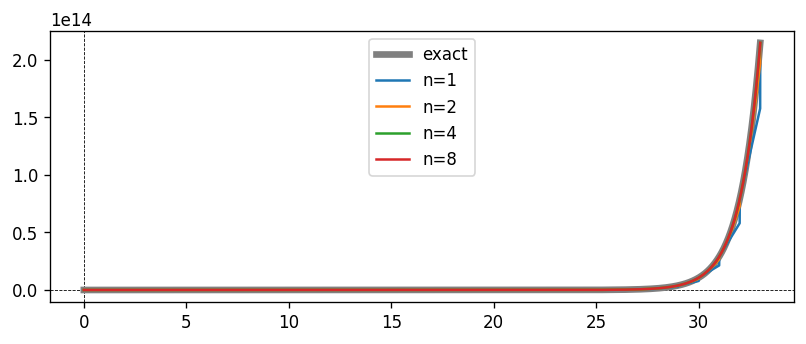

In [ ]:
# We could also compute e = exp(1, 20), but in general
# constants are hard-coded

def exp2(x, n):
  e = 2.718281828459045
  v = 1
  if x > 1:
    pow = int(x)   # compute the entire part of x
    v *= e**pow    # exponentiate the entire part efficiently
    x -= pow       # keep only the fractional part of x
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)   # multiply the value by the approximate exponent
                   # of the fractional part
  return v

plot_fun(exp2, numpy.exp,-3,3)

In [ ]:
print("n\tx\texp\t~exp\t~exp2\terr\terr2\n=====================================================")
for  logn in range(4):
  n = 2**logn
  for x in [-3.5, -1.5, 1.5, 3.5]:
    me = numpy.exp(x)
    e = exp(x, n)
    e2 = exp2(x, n)
    print(f"{n}\t{x}\t{me:.2f}\t{e:.2f}\t{e2:.2f}\t{abs(me - e):.2f}\t{abs(me - e2):.2f}")
  print("-----------------------------------------------------")

n	x	exp	~exp	~exp2	err	err2
1	-3.5	0.03	-2.50	0.02	2.53	0.01
1	-1.5	0.22	-0.50	0.18	0.72	0.04
1	1.5	4.48	2.50	4.08	1.98	0.40
1	3.5	33.12	4.50	30.13	28.62	2.99
-----------------------------------------------------
2	-3.5	0.03	3.62	0.03	3.59	0.00
2	-1.5	0.22	0.62	0.23	0.40	0.01
2	1.5	4.48	3.62	4.42	0.86	0.06
2	3.5	33.12	10.62	32.64	22.49	0.48
-----------------------------------------------------
4	-3.5	0.03	2.73	0.03	2.70	0.00
4	-1.5	0.22	0.27	0.22	0.05	0.00
4	1.5	4.48	4.40	4.48	0.08	0.00
4	3.5	33.12	24.02	33.11	9.09	0.01
-----------------------------------------------------
8	-3.5	0.03	0.19	0.03	0.16	0.00
8	-1.5	0.22	0.22	0.22	0.00	0.00
8	1.5	4.48	4.48	4.48	0.00	0.00
8	3.5	33.12	32.79	33.12	0.33	0.00
-----------------------------------------------------


## $\sin$

The Taylor series for the sine function is 

\begin{align}
\sin(x) &= x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots \\[8pt]
& = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1} \\[8pt]
\end{align}

and should give reasonable results for small $x$. 

In [ ]:
pi = 3.141592653589793

def sin(x, n):
  fact = 1
  val = x
  xi = x
  sign = 1
  for i in range(1, n+1):
    fact *= (2*i)*(2*i + 1)  
    xi *= x*x
    sign = -sign
    val += sign*xi/fact
  return val

For a small range the approximation will be fine:

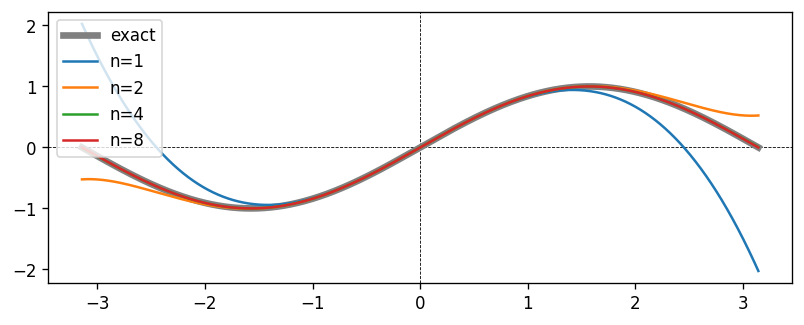

In [ ]:
plot_fun(sin, numpy.sin, -pi, pi)

However, for large values of $x$ the values will quickly go out of control:

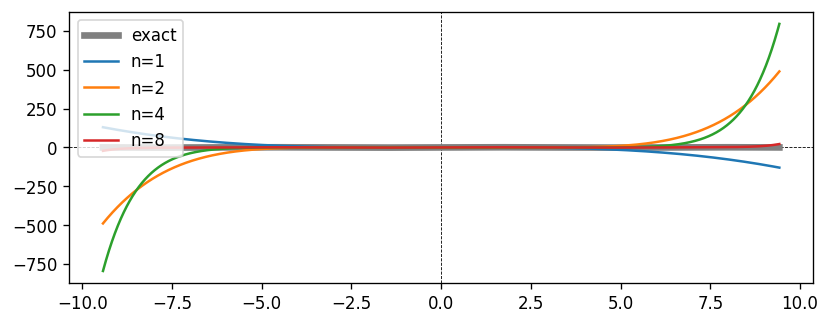

In [ ]:
plot_fun(sin, numpy.sin, -3*pi, 3*pi)

We may use the fact that $\sin(x + \pi) = -\sin(x)$ to obtain a function with a more even error distribution.

In [ ]:
def sin2(x, n):
   sign = 1
   if x < 0:
     sign = -sign
     x = -x
   k = int(x/pi)
   x -= k*pi
   if k % 2 == 1:
     sign = -sign
   return sign*sin(x, n)

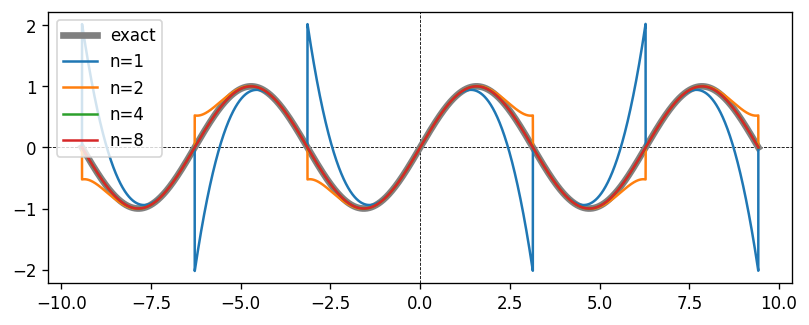

In [ ]:
plot_fun(sin2, numpy.sin, -3*pi, 3*pi)

A further improvement can use the fact that $sin(\frac \pi 2 + x) = sin(\frac \pi 2 - x)$:

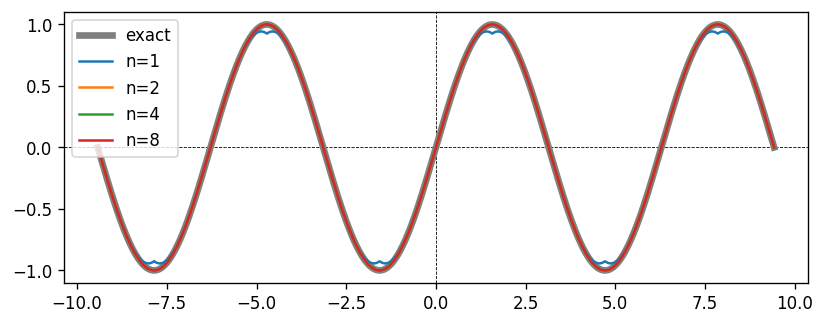

In [ ]:
def sin3(x, n):
   sign = 1
   if x < 0:
     sign = -sign
     x = -x
   k = int(x/pi)
   x -= k*pi
   if k % 2 == 1:
     sign = -sign
   if x > pi/2:
     x = pi - x
   return sign*sin(x, n)

plot_fun(sin3, numpy.sin, -3*pi, 3*pi)

In [ ]:
print("n\tx\tsin\t~sin\t~sin2\t~sin3\terr\terr2\terr3\n=====================================================================")
for  logn in range(4):
  n = 2**logn
  for x in [-7, -4, -2, 3, 5, 8]:
    me = numpy.sin(x)
    e = sin(x, n)
    e2 = sin2(x, n)
    e3 = sin3(x, n)
    print(f"{n}\t{x}\t{me:.3f}\t{e:.3f}\t{e2:.3f}\t{e3:.3f}\t{abs(me - e):.3f}\t{abs(me - e2):.8f}\t{abs(me - e3):.8f}")
  print("---------------------------------------------------------------------")

n	x	sin	~sin	~sin2	~sin3	err	err2	err3
1	-7	-0.657	50.167	-0.655	-0.655	50.824	0.00155792	0.00155792
1	-4	0.757	6.667	0.753	0.753	5.910	0.00381661	0.00381661
1	-2	-0.909	-0.667	-0.667	-0.894	0.243	0.24263076	0.01566513
1	3	0.141	-1.500	-1.500	0.141	1.641	1.64112001	0.00000047
1	5	-0.959	-15.833	-0.789	-0.931	14.874	0.17024031	0.02788020
1	8	0.989	-77.333	0.873	0.943	78.323	0.11591523	0.04662832
---------------------------------------------------------------------
2	-7	-0.657	-89.892	-0.657	-0.657	89.235	0.00001916	0.00001916
2	-4	0.757	-1.867	0.757	0.757	2.623	0.00006745	0.00006745
2	-2	-0.909	-0.933	-0.933	-0.910	0.024	0.02403591	0.00049239
2	3	0.141	0.525	0.525	0.141	0.384	0.38387999	0.00000000
2	5	-0.959	10.208	-0.973	-0.960	11.167	0.01448368	0.00111096
2	8	0.989	195.733	0.998	0.992	194.744	0.00837467	0.00229937
---------------------------------------------------------------------
4	-7	-0.657	-37.694	-0.657	-0.657	37.037	0.00000000	0.00000000
4	-4	0.757	0.662	0.757	0.757	0.095	0.000